### Description: Plots quadrature points vs levels for a given type of 1D quadrature
#### Author: Rimple Sandhu, Carleton University; Email: rimple_sandhu@outlook.com
#### Additional packages required: [UQTk](www.sandia.gov)

In [3]:
#!/usr/bin/python
from numpy import *
import matplotlib.pyplot as plt
import os
import math
import sys

UQTk quadrature setup options:
- Qtype = 'LU', 'HG', 'CC', 'CCO', 'NC', 'NCO'
- Qstype= 'full', 'sparse'

In [4]:
Qdim = 1
Qtype='CC'
Maxlevel= 5

Generate quadratrue points using UQtk (outputs into a file) and load/print them  

1 3
2 5
3 9
4 17
5 33


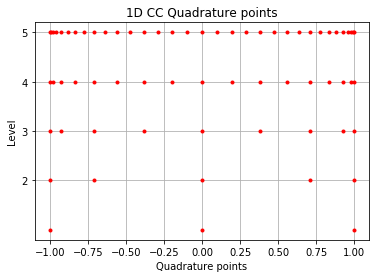

In [5]:
Msize=3
fig = plt.figure(1)
for i in range(1,Maxlevel+1):
    if Qtype == 'CC':
        nl = 2**i+1
    elif Qtype=='CCO':
        nl = 2**i-1
    else:
        nl = i
    CMD = 'generate_quad -d '+str(Qdim)+' -x full -p '+str(nl)+' -g '+Qtype
    os.system(CMD)
    Qpts = loadtxt('qdpts.dat')
    Qwgt = loadtxt('wghts.dat')
    print(i,len(Qpts))
    plt.plot(Qpts,i*ones(len(Qpts),),'ro',markersize=Msize)
    plt.yticks(range(2,Maxlevel+1))
    plt.ylabel('Level')
    plt.grid('on')
    plt.xlabel('Quadrature points')
    plt.title('1D '+Qtype+' Quadrature points')

In [6]:
fig.savefig('GQ1D_ptsVSlevels.pdf',bbox_inches='tight')